In [14]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Imputer, StandardScaler, TrainTestSplit
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Path of the file to read.
file_path = 'Data/train.csv'
test_data_path = 'Data/test.csv'

# Load data into a pandas DataFrame. Note: 1st column is ID
home_data = pd.read_csv(file_path, index_col=0)
test_data = pd.read_csv(test_data_path, index_col=0)

print(home_data.head())
print(home_data.shape)

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Numerical Columns

In [ ]:
print(home_data.select_dtypes(exclude=['object']).columns)
print(len(home_data.select_dtypes(exclude='object').columns))

In [ ]:
home_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Categorical Columns

In [ ]:
print(home_data.select_dtypes(include=['object']).columns)
print(len(home_data.select_dtypes(include='object').columns))

In [ ]:
home_data.select_dtypes(include=['object']).describe()

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Skew of target column

# It appears to be good practice to minimise the skew of the dataset. The reason often given is that skewed data adversely 
# affects the prediction accuracy of regression models.

# Note: While important for linear regression, correcting skew is not necessary for Decisions Trees and Random Forests.

# Exploring Numerical Data

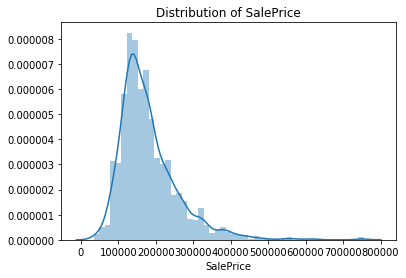

In [15]:
target = home_data.SalePrice
plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

In [ ]:
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [ ]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

In [ ]:
# Checking skew data
num_attributes = home_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

# columns that have skew data: LotFrontage, LotArea, 1stFlrSF, GrLivArea, OpenPorchSF
# A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
# BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
# 1stFlrSF (>4000)
# GrLivArea (>4000 AND SalePrice <300000)
# LowQualFinSF (>550)

In [ ]:
# Missing Values
home_data.select_dtypes(exclude='object').isna().sum().sort_values(ascending=False).head()

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Exploring Categorical Data

In [ ]:
cat_columns = home_data.select_dtypes(include='object').columns
print(cat_columns)

In [ ]:
var = home_data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=home_data.SalePrice, x=var)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=home_data.SalePrice, x=home_data.Neighborhood)
plt.xticks(rotation=40)
plt.show()

In [ ]:
# Count of categories per Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=home_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Missing Values
home_data.select_dtypes(include='object').isna().sum().sort_values(ascending=False).head(17)

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Cleaning Data and transforming

In [16]:
# Create copy of dataset
home_data_copy = home_data.copy()

# Dealing with missing/null values
# Numerical columns:
home_data_copy.MasVnrArea = home_data_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

for cat in cat_cols_fill_none:
    home_data_copy[cat] = home_data_copy[cat].fillna("None")
    
# Test data preparation

# create test_X which to perform all previous pre-processing on
test_data_copy = test_data.copy()

# Repeat treatments for missing/null values =====================================
# Numerical columns:
test_data_copy.MasVnrArea = test_data_copy.MasVnrArea.fillna(0)

# Categorical columns:
for cat in cat_cols_fill_none:
    test_data_copy[cat] = test_data_copy[cat].fillna("None")

# Missing Values
home_data_copy.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
Electrical       1
SalePrice        0
Foundation       0
dtype: int64

In [17]:
# Remove outliers based on observations on scatter plots against SalePrice:
home_data_copy = home_data_copy.drop(home_data_copy['LotFrontage']
                                     [home_data_copy['LotFrontage']>200].index)
home_data_copy = home_data_copy.drop(home_data_copy['LotArea']
                                     [home_data_copy['LotArea']>100000].index)
home_data_copy = home_data_copy.drop(home_data_copy['BsmtFinSF1']
                                     [home_data_copy['BsmtFinSF1']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy['TotalBsmtSF']
                                     [home_data_copy['TotalBsmtSF']>6000].index)
home_data_copy = home_data_copy.drop(home_data_copy['1stFlrSF']
                                     [home_data_copy['1stFlrSF']>4000].index)
home_data_copy = home_data_copy.drop(home_data_copy.GrLivArea
                                     [(home_data_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
home_data_copy = home_data_copy.drop(home_data_copy.LowQualFinSF
                                     [home_data_copy['LowQualFinSF']>550].index)

# A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
# BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
# 1stFlrSF (>4000)
# GrLivArea (>4000 AND SalePrice <300000)
# LowQualFinSF (>550)

# Reduce skew
home_data_copy['SalePrice'] = np.log(home_data_copy['SalePrice'])
home_data_copy = home_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})
print(home_data_copy.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave  None      Reg   
2           20       RL         80.0     9600   Pave  None      Reg   
3           60       RL         68.0    11250   Pave  None      IR1   
4           70       RL         60.0     9550   Pave  None      IR1   
5           60       RL         84.0    14260   Pave  None      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0   None  None        None   
2          Lvl    AllPub       FR2  ...        0   None  None        None   
3          Lvl    AllPub    Inside  ...        0   None  None        None   
4          Lvl    AllPub    Corner  ...        0   None  None        None   
5          Lvl    AllPub       FR2  ... 

In [ ]:
# Transforming data

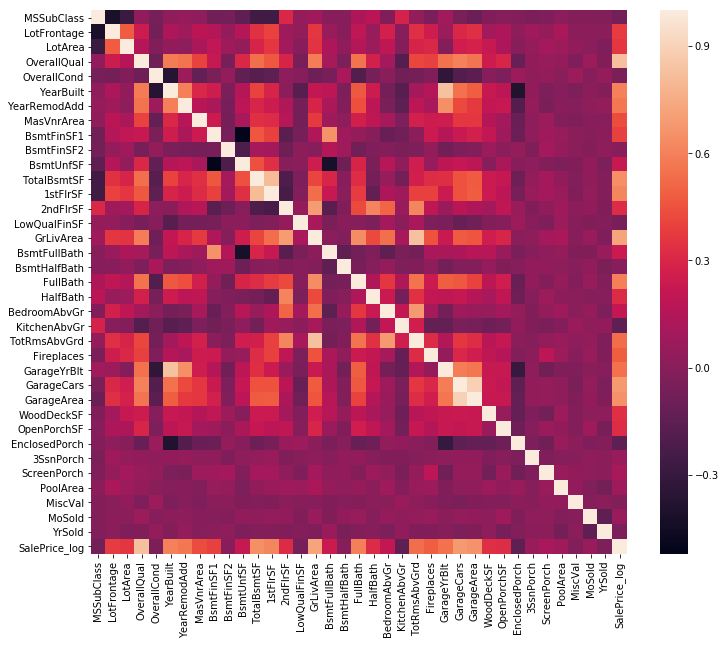

In [18]:
# Checking corr and choosing attributes to be removed

transformed_corr = home_data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

# Highly-correlated attributes
# GarageCars and GarageArea (0.882)
# YearBuilt and GarageYrBlt (0.826)
# GrLivArea_log1p and TotRmsAbvGrd (0.826)

# Remove one of the Highly-correlated attributes for the train_X and test_X data
attributes_corr_drop = ['SalePrice_log', 'GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd']

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Machine Learning

In [ ]:
# Preparation for machine learning

In [19]:
# Train data preparation

X = home_data_copy.drop(attributes_corr_drop, axis=1)

# Target
y = home_data_copy.SalePrice_log

# One-hot encoding for categorical data
X = pd.get_dummies(X)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

#Test data preparation

# Drop in test data
if 'SalePrice_log' in attributes_corr_drop:
    attributes_corr_drop.remove('SalePrice_log')

test_data_copy = test_data.drop(attributes_corr_drop, axis=1)

test_X = test_data_copy

# One-hot encoding for categorical data
test_X = pd.get_dummies(test_X)

# Ensure test data is encoded in the same manner as training data with align command
final_train, final_test = X.align(test_X, join='left', axis=1)

# Imputer for all other missing values in test data. Note: Do not 'fit_transform'
final_test_imputed = my_imputer.transform(final_test)

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Getting the best model

In [20]:
# Reminder: target is now log(SalePrice). After prediction call, need to inverse-transform to obtain SalePrice!

def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

#Decision Tree. Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=90, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare['DecisionTree_opt_max_leaf_nodes'] = val_mae
# print("Validation MAE for Decision Tree with best value of max_leaf_nodes: {:,.0f}".format(val_mae))

# Random Forest
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(val_y))

mae_compare['RandomForest'] = rf_val_mae
# print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


# XGBoost.
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(val_y))

mae_compare['XGBoost'] = xgb_val_mae
# print("Validation MAE for XGBoost Model: {:,.0f}".format(xgb_val_mae))

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(val_y))

mae_compare['LinearRegression'] = linear_val_mae
# print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

# Lasso
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(val_y))

mae_compare['Lasso'] = lasso_val_mae
# print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(val_y))

mae_compare['Ridge'] = ridge_val_mae
# print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

# ElasticNet
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(val_y))

mae_compare['ElasticNet'] = elastic_net_val_mae
# print("Validation MAE for Elastic Net Model: {:,.0f}".format(elastic_net_val_mae))

#KNN Regression
knn_model = KNeighborsRegressor()
knn_model.fit(train_X, train_y)
knn_val_predictions = knn_model.predict(val_X)
knn_val_mae = mean_absolute_error(inv_y(knn_val_predictions), inv_y(val_y))

mae_compare['KNN'] = knn_val_mae
# print("Validation MAE for KNN Model: {:,.0f}".format(knn_val_mae))

# Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(val_y))

mae_compare['GradientBoosting'] = gbr_val_mae
# print("Validation MAE for GradientBoosting Model: {:,.0f}".format(gbr_val_mae))

print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

/home/emanuelssj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/emanuelssj/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE values for different algorithms:


Algorithm
Lasso                              13752.0
Ridge                              14602.0
XGBoost                            14646.0
LinearRegression                   14874.0
GradientBoosting                   15350.0
ElasticNet                         16590.0
RandomForest                       17972.0
DecisionTree_opt_max_leaf_nodes    22221.0
KNN                                28650.0
dtype: float64

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Cross-validation in the best models

from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X)
n_folds = 10

In [ ]:
# Lasso
scores = cross_val_score(lasso_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

In [ ]:
scores = cross_val_score(rf_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Random Forest model:')
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

In [ ]:
scores = cross_val_score(ridge_model, imputed_X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Ridge model:')
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Grid search for hyperparameter tuning

In [ ]:
# Tuning Lasso
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()

grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_

In [ ]:
# Tuning Ridge
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': [0.0005, 0.0002, 0.002]}]
top_reg = Ridge()

grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(imputed_X, y)

grid_search.best_params_

In [ ]:
# -
# -
# -
# -
# -
# -
# -
# -
# -
# -

In [ ]:
# Choosing best model

In [ ]:
# Best model = Lasso?
# Best score: 13178.87052
final_model = Lasso(alpha=0.0005, random_state=5)

final_train_imputed = my_imputer.fit_transform(final_train)

final_model.fit(final_train_imputed, y)

test_preds = final_model.predict(final_test_imputed)

In [ ]:
# Best model = Ridge?
# Best score: 13178.87052
final_model = Lasso(alpha=0.0005, random_state=5)

final_train_imputed = my_imputer.fit_transform(final_train)

final_model.fit(final_train_imputed, y)
 
test_preds = final_model.predict(final_test_imputed)

In [ ]:
# Best model = Random Forest Regressor?
# Best score: 17277.17952
final_model = RandomForestRegressor(n_estimators=10, random_state=5)

final_train_imputed = my_imputer.fit_transform(final_train)

final_model.fit(final_train_imputed, y)

test_preds = final_model.predict(final_test_imputed)

In [21]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': inv_y(test_preds)})

output.to_csv('submission.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'Id'